### Chess Games
To begin, we need to prepare the data that is readily available for us in `games.csv`. There are 6 columns that will be kept which are turns, white_rating, black_rating, rated, winner and first_move. From all of these columns, we will have to parse the moves column to receive the first_move and then use one hot encoding to successfully run our algorithms on the categorical data. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import constants

# Load your dataset
data = pd.read_csv('./datasets/games.csv')
filtered_data = data[data['turns'] >= 30].copy()  # Use .copy() to ensure you are working on a copy

# Define the target column and set random_state
target_column = 'winner'

# parse out the first move
filtered_data['moves'] = filtered_data['moves'].str.split()
filtered_data['first_move'] = filtered_data['moves'].str[0]
# filtered_data['second_move'] = filtered_data['moves'].str[1] #TODO: If I want to include the second move

# List the columns to keep - and drop the rest 
columns_to_keep = ["turns", "white_rating", "black_rating", "rated", "winner", "first_move"]
data = filtered_data[columns_to_keep]

# Create one-hot encoding for the "first_move" column, and drop the first_move column
one_hot_encoded = pd.get_dummies(data['first_move'], prefix='first_move', drop_first=True)
data_encoded = pd.concat([data, one_hot_encoded], axis=1)
data_encoded = data_encoded.drop(columns=['first_move'])

# Set the X and y for the data 
X = data_encoded.drop(columns=[target_column])
y = data_encoded[target_column]

# Print out data and stats to ensure correct
num_entries = data.shape[0]
print("Number of entries:", num_entries)
num_features = data.shape[1]
print("Number of features:", num_features)
print(data_encoded.head(3))

Number of entries: 16715
Number of features: 6
   turns  white_rating  black_rating  rated winner  first_move_Nc3  \
2     61          1496          1500   True  white           False   
3     61          1439          1454   True  white           False   
4     95          1523          1469   True  white           False   

   first_move_Nf3  first_move_Nh3  first_move_a3  first_move_a4  ...  \
2           False           False          False          False  ...   
3           False           False          False          False  ...   
4           False           False          False          False  ...   

   first_move_d3  first_move_d4  first_move_e3  first_move_e4  first_move_f3  \
2          False          False          False           True          False   
3          False           True          False          False          False   
4          False          False          False           True          False   

   first_move_f4  first_move_g3  first_move_g4  first_move_h3 

Next we must split the data into the training and tests set. 

In [2]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=constants.TEST_SIZE, random_state=constants.RANDOM_STATE)

### Decision Tree
Train using the values for a decision tree, and then plot the learning curve using the cross validation value set globally.

In [3]:
from dt_3 import dt
best_dt_model, best_dt_params = dt(X_train, X_test, y_train, y_test, constants.CV)


Best Hyperparameters: {'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 2}
cross validation: 5
Accuracy: 0.6009572240502543
Classification Report:
               precision    recall  f1-score   support

       black       0.63      0.53      0.58      1622
        draw       0.75      0.02      0.04       147
       white       0.58      0.73      0.64      1574

    accuracy                           0.60      3343
   macro avg       0.65      0.43      0.42      3343
weighted avg       0.61      0.60      0.59      3343



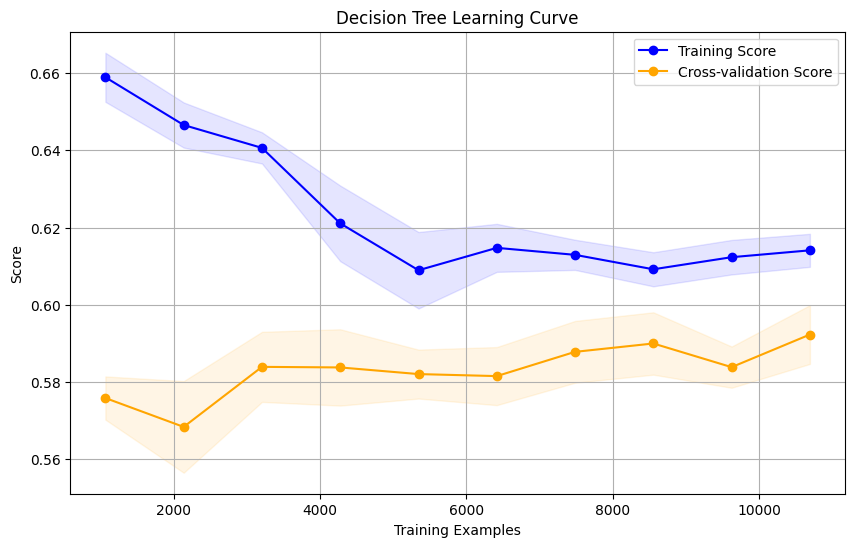

In [4]:
from graphs import plot_learning_curve
plot_learning_curve(best_dt_model, X_train, y_train, cv=constants.CV, scoring='accuracy', title="Decision Tree Learning Curve")

### Neural Networks

In [6]:
from nn_3 import nn
best_nn_model, best_nn_params = nn(X_train, X_test, y_train, y_test, constants.CV)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
plot_learning_curve(best_nn_model, X_train, y_train, cv=constants.CV, scoring='accuracy', title="Decision Tree Learning Curve")